In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eps = 1
rc = 1
v0 = 1
v = v0

In [3]:
def circuit(v,t):
    return -v

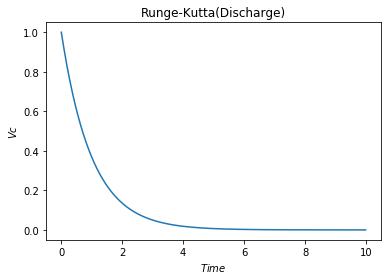

In [4]:
a = 0
b = 10
N = 1000
h = (b-a)/N

tpoints = np.arange(a,b,h)#begin, end, step size
vpoints = []

for time in tpoints:
    vpoints.append(v)
    k1 = h*circuit(v,time)
    k2 = h*circuit(v+0.5*k1,time+0.5*h)
    k3 = h*circuit(v+0.5*k2,time+0.5*h)
    k4 = h*circuit(v+k3,time+h)
    v = v + (k1+2*k2+2*k3+k4)/6

plt.plot(tpoints, vpoints)
plt.title('Runge-Kutta(Discharge)')
plt.xlabel('$Time$')
plt.ylabel('$Vc$')
plt.show()

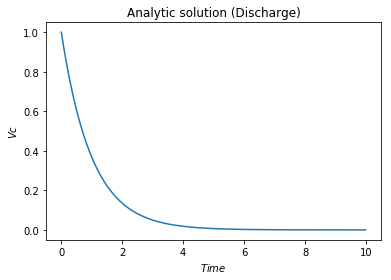

In [5]:
vc = eps*np.exp(-tpoints/rc) #analytic solution
plt.plot(tpoints,vc)
plt.title('Analytic solution (Discharge)')
plt.xlabel('$Time$')
plt.ylabel('$Vc$')
plt.show()

In [6]:
def charge(v1,t):
    return (1/rc)*(eps-v1)

In [7]:
v1 = 0
v1points = []
for time in tpoints:
    v1points.append(v1)
    k1 = h*charge(v1,time)
    k2 = h*charge(v1+0.5*k1,time+0.5*h)
    k3 = h*charge(v1+0.5*k2,time+0.5*h)
    k4 = h*charge(v1+k3,time+h)
    v1 = v1 + (k1+2*k2+2*k3+k4)/6

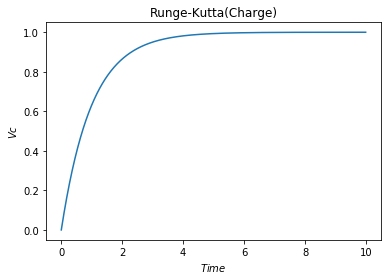

In [8]:
plt.plot(tpoints, v1points)
plt.title('Runge-Kutta(Charge)')
plt.xlabel('$Time$')
plt.ylabel('$Vc$')
plt.show()

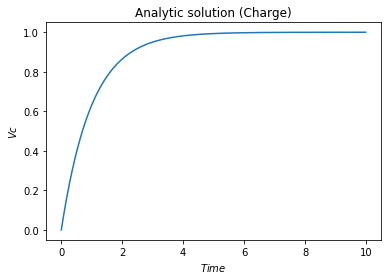

In [9]:
vc1 = eps*(1-np.exp(-tpoints/rc)) #analytic solution
plt.plot(tpoints,vc1)
plt.title('Analytic solution (Charge)')
plt.xlabel('$Time$')
plt.ylabel('$Vc$')
plt.show()